# Exercise 6 - OOP
In this exercise, you get to familiarize yourself with strings, file handling, error handling and strings. This exercise covers 13-16

## 0. Unit conversion (*)
Create a class for converting US units to the metric system. It should have the following bound methods:
<br>
<br>
Make sure that value is the correct type and format, raise suitable exceptions in case it isn't. Make value into property with getter and setter. Test your class manually by instantiating an object from it and test different methods. (*)

### Understand the task:
Create a Python class that converts US Units to Metrics.

**Conversion Methods**
<br>
<br>
inch -> centimeters<br>
1 inch = 2.54 cm
<br>
<br>
foot -> meters<br>
1 foot = .3048 m
<br>
<br>
pound -> kilogram<br>
1 pount = 0.453592 kg




In [1]:
class Converter:
    """
    Unit conversion class that converts common US units into metric equivalents.

    Attributes:
    value: float
    The numeric value to be converted 

    Methods:
    inch_to_cm():
        Converts inches to centimeters

    foot_to_meters():
        Converts feet to meters

    pound_to_kg():
        Converts pound to kg

    __repr__():
        Returns a developer readable string representation
    
    __str()__:
        Returns a user friendly formatted conversion summary. 
    """

    def __init__(self, value):
        self.value = value

        """
         Initializes the Converter object.

        Parameters
        ----------
        value : int, float, or str
            The input value to convert. The code will attempt to cast
            it into a float. If the conversion fails (e.g., invalid input),
            the value defaults to 0.
        """

        # Make sure value is correct type format
        try:
            # try to convert the value in float
            self.value = float(value)
            
        except ValueError:
            print("Value Error. Value input must be a number")
            # set to 0 if invalid
            self.value = 0

    # convert inch to cm function
    def inch_to_cm(self):
        return self.value * 2.54
    # convert foot to meter function
    def foot_to_meters(self):
        return self.value * .3408
    # convert pound to kg function
    def pound_to_kg (self):
        return self.value * 0.453592
    

    # develop friendly representation (for debugging)
    def __repr__(self):
        return f"Converter(value={self.value})"
    
    # user-friendly printout
    def __str__(self):
        return (f"Inch to cm: {self.inch_to_cm()}\n"
                f"foot to meters{self.foot_to_meters()}\n"
                f"pound to kilogram{self.pound_to_kg()}")
       



In [2]:
# Test class manually by instantiating an object from it and test different methods
x = Converter(input("Value to convert: "))
print(x.inch_to_cm())
print(x.foot_to_meters())
print(x.pound_to_kg())



30.48
4.0896
5.443104


In [3]:
print(x)

Inch to cm: 30.48
foot to meters4.0896
pound to kilogram5.443104


<br>

## 2. Student and Teacher (*)
Create two classes named Student and Teacher that inherits from Person.

**The Student class shall have:**

1. study() method that prints out
study...study...study...more study 

2. override say_hello() with the following message:
Yo, I am a student, my name is ..., I am ... years old, my email address is ...
______________________________________________________

**The Teacher class shall have:**

1. teach() method that prints out
teach...teach...teach...more teaching

2. Instantiate a Teacher object and a Student object. Call

teach() and say_hello() methods from your Teacher object.
study() and say_hello() methods from your Student object.

In [4]:
class Person:
    def __init__(self, name, age, email):
        self.name = name
        self.age = age
        self.email = email
    
    def say_hello(self):
        print(f"Hello, I am {self.name}, and I'm {self.age} years old. My email address is {self.email} ")

# inherit from Person
class Student(Person):
    """
    A subclass of Person that represents a student.

    Inherits all attributes from Person and adds:
    - study() method
    - a custom version of say_hello()
    """
    def study(self):
        print("study...study...study...more study")
    
    def say_hello(self): 
        # overwrite the say_hello() function
        print(f"Hello, I am {self.name}, and I'm {self.age} years old. My email address is {self.email} ")

# inherit from Person
class Teacher(Person):
    """
    A subclass of Person that represents a teacher.

    Inherits all attributes from Person and adds:
    - teach() method
    """
    def teach(self):
        print("teach...teach...teach...more teaching")
    
    def say_hello(self): 
        # overwrite the say_hello() function
        print(f"Hello, I am {self.name}, and I'm {self.age} years old. My email address is {self.email} ")


# instantiate objects
student1 = Student("Aira", 25, "aira@studentmail.com")
teacher1 = Teacher("Robin", 45, "teacherrobin@school.com")

# call methods
teacher1.teach()
teacher1.say_hello()

student1.study()
student1.say_hello()

teach...teach...teach...more teaching
Hello, I am Robin, and I'm 45 years old. My email address is teacherrobin@school.com 
study...study...study...more study
Hello, I am Aira, and I'm 25 years old. My email address is aira@studentmail.com 


<br>

## 3. Plotting library (\*\*)

Create a class called `PlotAnnotator` which takes in a figure and axes instances and exposes a method called arrow, which serves the purpose of creating an annotation to a plot. Note that you might need other methods and/or properties, e.g. something that can return the figure instance.

Also add some settings so that you can reuse it for other plots. For simplicity you could have the settings directly in PlotAnnotator class, or if you'd like you could make use of inheritance or composition to separate concerns and make the classes have single responsibilities.

For example a manual test could look like this:

```python
np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 5 + np.random.normal(0, 2, size=len(x))

annotate = AnnotatePlot(fig, ax)
annotate.arrow("Big dip here", (8, 10), (7.5, 14.8))
```

<img style="display:inline-block; text-align:left; max-width:40ch;" src="https://github.com/kokchun/assets/blob/main/python/annotator.png?raw=true" >


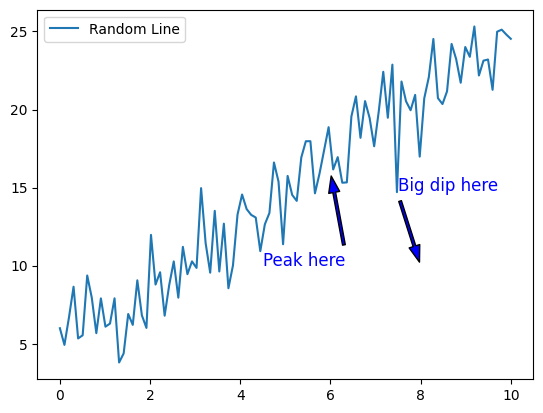

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# ------------------------
# 1. Define classes
# ------------------------

class PlotSettings:
    """Reusable default style parameters for arrows and text."""
    def __init__(self, color="red", fontsize=10, shrink=0.05):
        self.color = color
        self.fontsize = fontsize
        self.shrink = shrink


class PlotAnnotator:
    """Creates annotations (arrows + text) on Matplotlib plots."""
    def __init__(self, fig, ax, settings=None):
        self.figure = fig
        self.ax = ax
        self.settings = settings or PlotSettings()
        """If a settings object is passed, it uses that.
        If none is passed, it makes a new one with default values."""

    def arrow(self, text, xy_point, xy_text):
        """Draw annotation using pre-configured settings."""
        self.ax.annotate(
            text,
            xy=xy_point,
            xytext=xy_text,
            arrowprops=dict(
                facecolor=self.settings.color,
                shrink=self.settings.shrink,
                width=2,
                headwidth=8
            ),
            fontsize=self.settings.fontsize,
            color=self.settings.color
        )


# ------------------------
# 2. Manual test
# ------------------------

np.random.seed(42)
x = np.linspace(0, 10, 100)
y = 2 * x + 5 + np.random.normal(0, 2, size=len(x))

# Create a plot
fig, ax = plt.subplots()
ax.plot(x, y, label="Random Line")
ax.legend()

# Use PlotAnnotator
annotator = PlotAnnotator(fig, ax, PlotSettings(color='blue', fontsize=12))
annotator.arrow("Peak here", (6, 16), (4.5, 10))
annotator.arrow("Big dip here", (8, 10), (7.5, 14.8))

plt.show()


**Core OOP concepts demonstrated**

- Encapsulation: the plot annotation logic is isolated in a class.

- Reusability: one PlotAnnotator can handle many plots.

- Composition: PlotAnnotator can include a PlotSettings object for style control.

What’s happening here:
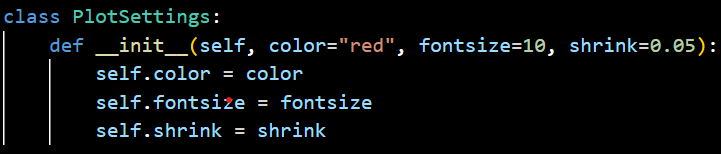

__init__ is the constructor — it runs every time you create a PlotSettings object.

color, fontsize, and shrink are parameters with default values.

If the user doesn’t provide them, it automatically uses "red", 10, and 0.05.

Inside, these are saved into the object itself using self.

shrink controls how much space is left between the arrowhead and the text/point it connects to.

| Class           | Purpose                                                                          | Example                            |
| --------------- | -------------------------------------------------------------------------------- | ---------------------------------- |
| `PlotSettings`  | Stores **style settings** for annotations (color, text size, etc.)               | `PlotSettings(color="blue")`       |
| `PlotAnnotator` | Handles **plot annotation logic**, using both the figure (`fig`) and axes (`ax`) | `PlotAnnotator(fig, ax, settings)` |


Now this is your main tool — the class that will actually add annotations to your Matplotlib plot.

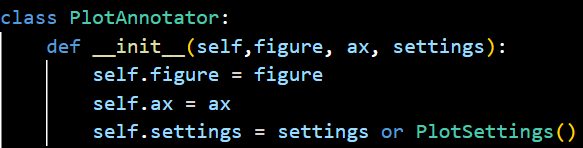

Breaking it down:

figure and ax come from Matplotlib.
fig (figure) = the overall window or canvas for the plot.

ax (axes) = the specific plotting area inside that window (where lines and labels go).

This means that later, any method inside PlotAnnotator can use self.ax to draw arrows or labels on the same plot.

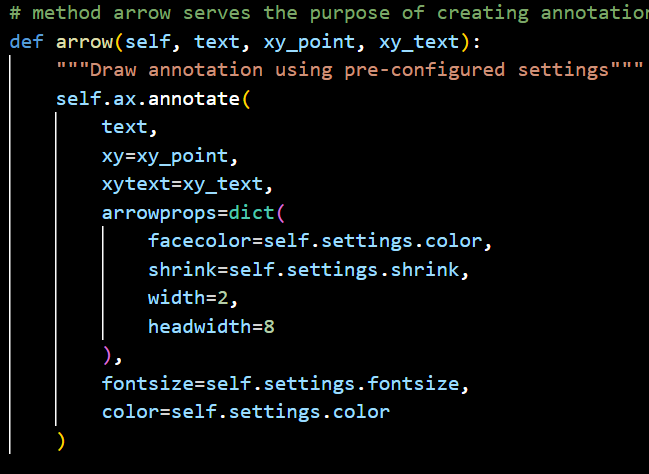
**Actual plotting function**<br>
This is a method inside your PlotAnnotator class.

self → refers to the current PlotAnnotator object (so it can access things like self.ax and self.settings).

text → the message you want to display (e.g., "Big dip here").

xy_point → the exact location (x, y) of the point on the plot you want to point the arrow to.

xy_text → the location (x, y) where the text should appear (the tail of the arrow).

So you’re basically saying:

“Draw an arrow from this data point to this text, with these settings.”<br>

**Arrow Styling**<br>
This arrowprops part is a dictionary that defines how the arrow looks.

´facecolor=self.settings.color´
→ uses the color you defined earlier (e.g., "red" or "blue").

shrink=self.settings.shrink
→ shortens the arrow a little on both ends so it doesn’t overlap text or points.

width=2
→ thickness of the arrow’s line.

headwidth=8
→ size of the arrowhead (bigger = fatter head).

All these settings make your arrow visually cleaner.

<br>

## 4. Video (\*)

Create classes following this UML:

<img src="https://github.com/kokchun/assets/blob/main/python/uml_video.png?raw=true" width="700"/>

Note that the method info() should be different in the different classes where it should be implemented.

Use the following code to test your program.

```python
pokemon = TV_serie("Pokemon", "Cartoon", 4.5, 550)
titanic = Movie("Titanic", "Romance", 4.7, 194)
code = Documentary("The Code", "Math", 4)

for video in tuple((pokemon, titanic, code)):
    print(video.info())
```

An example output could be:

```
TV series with title Pokemon, genre Cartoon, rating 4.5 and episodes 550

Movie with title Titanic, genre Romance, rating 4.7, duration 194 minutes

Video with title The Code, genre Math and rating 4
```

(\*)

In [6]:
# Base(Parent) Class
class Video:
    # initialize COMMON atributes shared by all videos
    def __init__(self, title, genre, rating):
        self.title = title
        self.genre = genre
        self.rating = rating
    
    # method that returns formatted info about the video
    def info(self):
        return f"Video with title {self.title}, genre{self.genre}and rating{self.rating}."

# Subclass representing a Movie (inherits from video)
class Movie(Video):
    def __init__(self, title:str, genre:str, rating:float, duration:float):
        # call the parent constructor (Video) to initialize common attributes
        # super() = access to the parent class, to avoid manually writting the common attributes
        super().__init__(title, genre, rating)
        # add a uniqie attribute specific to movies
        self.duration = duration

    # override the info() method to include movie-specific details
    def info(self):
        return f"Video with title {self.title}, genre {self.genre}, rating {self.rating} and duration {self.duration} minutes."
    

# Subclass representing a TV Serie (inherits from video)
class TV_Serie(Video):
    def __init__(self, title:str, genre:str, rating:float, num_episodes:int):
    # call the parent constructor (Video) to initialize common attributes
    # super() = access to the parent class, to avoid manually writting the common attributes
        super().__init__(title, genre, rating)
        # add a uniqie attribute specific to movies
        self.num_episodes = num_episodes
    
    # override the info() method to include tv series-specific details
    def info(self):
        return f"TV serie with title {self.title}, genre {self.genre}, rating {self.rating} and {self.num_episodes} episodes."
    

    # Subclass representing a Documentary (inherits from video)
class Documentary(Video):
    def __init__(self, title, genre, rating):
        # call the parent constructor (Video) to initialize common attributes
        # super() = access to the parent class, to avoid manually writting the common attributes
        super().__init__(title, genre, rating)

        # override the info() method to include documentary specific details
        def info(self):
            return f"Documentary with the title {self.title}, genre {self.genre} and rating {self.rating}"


# == Manually Test Program ==
# create instances (objects) of each class with relevant data
pokemon = TV_Serie("Pokemon", "Cartoon", 4.5, 550)
titanic = Movie("Titanic", "Romance", 4.7, 194)
code = Documentary("The Code", "Math", 4)

# Loop through all objects and print their info
# This demonstrates polymorphism — the same method name behaves differently per class
# "(pokemon, titanic, code)" is the tuple
for video in (pokemon, titanic, code):
    print(video.info())



TV serie with title Pokemon, genre Cartoon, rating 4.5 and 550 episodes.
Video with title Titanic, genre Romance, rating 4.7 and duration 194 minutes.
Video with title The Code, genreMathand rating4.


super() is like calling your parent class for help — it gives a subclass access to methods and attributes from its superclass (parent class) without having to rewrite them.

Let’s break it down in context:

When you run
super().__init__(title, genre, rating)
it literally means:
“Hey, go run the parent class (Video)'s __init__ method and set up title, genre, and rating for me.”

That way, you don’t repeat code already written in the parent.
It’s an efficiency move — you inherit the parent’s setup while adding your subclass-specific parts.

So conceptually:

super() = access to the parent class

__init__() = the parent’s constructor that initializes attributes

If you didn’t use super(), you’d have to manually rewrite those attributes like:

In [7]:
"""
class Movie(Video):
    def __init__(self, title, genre, rating, duration):
        super().__init__(title, genre, rating)
        self.duration = duration
    """


'\nclass Movie(Video):\n    def __init__(self, title, genre, rating, duration):\n        super().__init__(title, genre, rating)\n        self.duration = duration\n    '

In [8]:
"""
self.title = title
self.genre = genre
self.rating = rating
"""


'\nself.title = title\nself.genre = genre\nself.rating = rating\n'

That would break the DRY (Don’t Repeat Yourself) principle — which in software engineering is about eliminating duplication to make code cleaner and easier to maintain.

Think of super() as your subclass saying: “I’ll handle the new stuff — but parent, can you set up the basics for me?”

<br>

## 5. Fraction (**)

Create a class called Frac to represent mathematical fractions. The class is instantiated with two instance variables: nominator and denominator. Objects instantiated from this class should have methods for addition, subtraction, multiplication, division using the operators +,-,*,/. Note that these implemented methods must be mathematically correct. Also implement the following methods:
Operator Overloading


simplify(self, value = None) # simplifies to most simple form unless value is given

__str__(self) # represent the fraction in a neat way for printing

mixed(self) # represent the fraction in mixed terms

__eq__(self, other) # checks equality by overloading ==
<br>
Also remember to handle errors and validations.

Example of tests that it should handled:

1/2 + 1/3 = 5/6<br>
1/2 - 1/3 = 1/6<br>
7/6 --> 1 1/6 (mixed)<br>
3*1/2 = 3/2<br>
1/2 * 3 = 3/2<br>
1/4 + 2 = 9/4<br>
1/4 / 1/2 = 1/2<br>
2/4 == 1/2 --> True<br>
3/4 += 2 = 11/4<br>
Add unit testing to this class<br>

## Solution A: Reilaince on Python built in Fractions module
with try except, clear method separation,

In [ ]:
"""
In the following code below:
"other" is the second value you are adding to your current fraction object (self).

a = Frac(1, 2)
b = Frac(1, 3)
c = a + b

it automatically calls
a.__add__(b)

self → refers to a (the first fraction)
other → refers to b (the second one being added)

So in short:
self is the current object,
other is the object (or value) you’re adding to it.
"""

#### Not final code

In [3]:
from fractions import Fraction
"""
A simple fraction class for basic math using operator overloading.
"""
class Frac:
    def __init__(self, numerator, denominator = 1):
        """ DEFAULT INTERFACE DESIGN CHOICE:
        standardize all inputs to perform arithmetic
        if a fraction doesn't have a denominator, assume it's 1"""

        # Initialize a Frac object with validation and error handling.
        try:
            # 1. check numerator and denominator are integers
            if not isinstance(numerator, int) or not isinstance(denominator, int):
                raise TypeError("Both numerator and denominator must be an integer")
            
            # 2. check denominator is not 0
            if denominator == 0:
                raise ZeroDivisionError("Denominator cannot be zero")

            # store the value as a fraction
            self.value = Fraction(numerator, denominator)
        
        except (TypeError, ZeroDivisionError) as e:
            print(f'Error: {e}')
            # re raise to stop the program when invalid input is used
            raise
    
# ----------------ARITHMETIC OPERATORS explaining add ------------------

    def __add__(self, other=None):  
     
        # Method to add two fractions (or a fraction and an integer)
        # 'other' is the second value to add; default is None
    
        if isinstance(other, int):
            # If 'other' is an integer, convert it into a fraction
            # Example: 2 becomes 2/1
            other = Fraction(other, 1)

        elif isinstance(other, Frac):
            # If 'other' is already a Frac object, get its internal value
            # If the thing I’m adding (other) is another Frac object, 
            # extract the actual Fraction value stored inside it, so I can perform arithmetic with it.
            other = other.value  

        else:
            # If 'other' is not a Frac or an int, show an error message
            raise TypeError("Can only add Frac or integer types")

        # Add the two fraction values together
        result = self.value + other

        # Return a new Frac object with the result's numerator and denominator
        return Frac(result.numerator, result.denominator)
    

# ---------------------ARITHMETIC OPERATIONS--------------------------------------


    def __sub__(self,  other = None):
        if isinstance (other, int):
            other = Fraction(other, 1)
        elif isinstance(other, Frac):
            other = other.value
        else:
            raise TypeError("Can only add Frac or integer types")
        result = self.value - other
        return Frac(result.numerator, result.denominator)

    
    def __mult__(self, other = None):
        if isinstance (other, int):
            other = Fraction(other, 1)
        elif isinstance(other, Frac):
            other = other.value
        else:
            raise TypeError("Can only add Frac or integer types")
        result = self.value * other
        return Frac(result.numerator, result.denominator)


    def __truediv__(self, other = None):
        if isinstance (other, int):
            other = Fraction(other, 1)
        elif isinstance(other, Frac):
            other = other.value
        else:
            raise TypeError("Can only add Frac or integer types")
        result = self.value / other
        return Frac(result.numerator, result.denominator)

    def __eq__(self, value = None):
        if isinstance (other, int):
            other = Fraction(other, 1)
        elif isinstance(other, Frac):
            other = other.value
        else:
            return False
        return self.value == other
    

# ---------------------DISPLAY METHODS--------------------------------------
def __str__(self):
    return f'{self.value.numerator} / {self.value.denominator}'

def mixed(self):
    # Show improper fractions as mixed numbers
    n, d = self.value.numerator, self.value.denominator
    whole = n // d
    remainder = abs(n % d)

    if remainder == 0:
        return f'{whole}'
    elif abs(n) < d:
        return f'{n}/{d}'
    else:
        return f'{whole} {remainder}/{d}'

In [ ]:
# Detailed explanation of def__add__
"""
def __add__(self, other = None): # None simplifies to most simple form unless value is given
        if isinstance(other,Frac):
            # if the thing added is another Frac object
            # extract internal Fraction value for proper math
            other = other.value

        elif isinstance(other,int):
            # if adding an int, convert to fraction so Python can add
            other = Fraction(other)
        
        else:
            # if type is str or float, tell Python don't know how to add it to Frac
            return NotImplemented
        
        # perform actual addition between 2 fraction objects
        result = self.value + other
        # wrap the result fraction into a new Frac obj
        return Frac(result)

"""

#### this is the final code

In [5]:
from fractions import Fraction

"""
A simple fraction class for basic math operations using operator overloading.
This class wraps Python's built-in Fraction class for easy arithmetic.
"""

class Frac:
    def __init__(self, numerator, denominator=1):
        """
        Create a Frac object with numerator and denominator.
        Default denominator is 1 for whole numbers.
        Example: Frac(3) means 3/1.
        """
        try:
            # Check numerator and denominator are integers
            if not isinstance(numerator, int) or not isinstance(denominator, int):
                raise TypeError("Both numerator and denominator must be integers")

            # Prevent division by zero
            if denominator == 0:
                raise ZeroDivisionError("Denominator cannot be zero")

            # Store the fraction as a built-in Fraction object
            self.value = Fraction(numerator, denominator)

        except (TypeError, ZeroDivisionError) as e:
            print(f"Error: {e}")
            raise  # Stop program if invalid inputs are used

# ------------------------------------------------------------------------
# ARITHMETIC OPERATOR METHODS
# ------------------------------------------------------------------------

    def __add__(self, other=None):
        """Add two fractions (or a fraction and an integer)."""
        if isinstance(other, int):
            # Convert integer into a fraction form, like 2 → 2/1
            other = Fraction(other, 1)
        elif isinstance(other, Frac):
            # If 'other' is a Frac object, use its stored Fraction value
            other = other.value
        else:
            # For unsupported types
            raise TypeError("Can only add Frac or integer types")

        # Perform addition using Fraction arithmetic
        result = self.value + other

        # Return a new Frac object from the result
        return Frac(result.numerator, result.denominator)

    def __sub__(self, other=None):
        """Subtract two fractions (or a fraction and an integer)."""
        if isinstance(other, int):
            other = Fraction(other, 1)
        elif isinstance(other, Frac):
            other = other.value
        else:
            raise TypeError("Can only subtract Frac or integer types")

        result = self.value - other
        return Frac(result.numerator, result.denominator)

    def __mul__(self, other=None):
        """Multiply two fractions (or a fraction and an integer)."""
        if isinstance(other, int):
            other = Fraction(other, 1)
        elif isinstance(other, Frac):
            other = other.value
        else:
            raise TypeError("Can only multiply Frac or integer types")

        result = self.value * other
        return Frac(result.numerator, result.denominator)

    def __truediv__(self, other=None):
        """Divide two fractions (or a fraction and an integer)."""
        if isinstance(other, int):
            other = Fraction(other, 1)
        elif isinstance(other, Frac):
            other = other.value
        else:
            raise TypeError("Can only divide Frac or integer types")

        result = self.value / other
        return Frac(result.numerator, result.denominator)

    def __eq__(self, other=None):
        """Check if two fractions are equal in value."""
        if isinstance(other, int):
            other = Fraction(other, 1)
        elif isinstance(other, Frac):
            other = other.value
        else:
            return False  # Not comparable
        return self.value == other

# ------------------------------------------------------------------------
# DISPLAY METHODS
# ------------------------------------------------------------------------

    def __str__(self):
        """Display the fraction neatly as 'numerator/denominator'."""
        return f"{self.value.numerator}/{self.value.denominator}"

    def mixed(self):
        """Display improper fractions as mixed numbers (e.g., 7/6 → 1 1/6)."""
        n, d = self.value.numerator, self.value.denominator
        whole = n // d           # Integer division to get the whole part
        remainder = abs(n % d)   # Get the leftover part

        if remainder == 0:
            return f"{whole}"
        elif abs(n) < d:
            return f"{n}/{d}"
        else:
            return f"{whole} {remainder}/{d}"


# ------------------------------------------------------------------------
# TEST CODE
# ------------------------------------------------------------------------

print(Frac(1, 2) + Frac(1, 3))   # expected: 5/6
print(Frac(1, 2) - Frac(1, 3))   # expected: 1/6
print(Frac(3, 1) * Frac(1, 2))   # expected: 3/2
print(Frac(1, 2) * Frac(3, 1))   # expected: 3/2
print(Frac(1, 4) + Frac(2, 1))   # expected: 9/4
print(Frac(1, 4) / Frac(1, 2))   # expected: 1/2
print(Frac(2, 4) == Frac(1, 2))  # expected: True

x = Frac(3, 4)
x = x + Frac(2, 1)
print(x)                         # expected: 11/4

print(Frac(7, 6).mixed())        # expected: 1 1/6


5/6
1/6
3/2
3/2
9/4
1/2
True
11/4
1 1/6


## Solution B: Mathematical Logic
manual GCD reduction, no reliance on Python's built in Fraction class

#### _reduce()
This is a helper function used to simplify fractions.

It finds the GCD (greatest common divisor) of the numerator and denominator.
Example: for 6/8, the GCD is 2.

It divides both by the GCD → 6 ÷ 2 = 3, 8 ÷ 2 = 4 → simplified to 3/4.

The sign decides if the result is positive or negative.

So _reduce(6, 8, 1) returns (3, 4).
If one was negative, _reduce(-6, 8, -1) returns (-3, 4).
_______________________________________________________________________________________

<br>

#### rhs
x == y
Python calls
x.__eq__(y)

So inside your method:

self → refers to the left-hand side (LHS) of the operation → x

the argument (often written as rhs) → refers to the right-hand side → y

That’s why you’ll often see people name it rhs — short for Right-Hand Side.
It’s just a label, not a special keyword.

You could write it as:
def __eq__(self, other):

Python doesn’t care what you call it — rhs, other, b, even banana — it’s just a variable name.

But using rhs is nice because:

It clearly reminds you which side of the comparison this object is on.

It’s consistent with math and code readability (especially when you have both sides doing cross-multiplication like self.numerator * rhs.denominator).

In [7]:
"""
A simple Fraction class for basic math operation overloading.
This version performs the function math manually - not using Python's built in function
See how fractions are created, reduced and compared
"""

class Frac2:
    def _reduce(self, n, d, sign):
        # Simplify fraction using Euclid's algorithm for GCD
        a, b = abs(a), abs(b)
        while b != 0:
            a, b = b, a % b #keep replacing until remainder is 0
        # divide both by GCD and apply sign
        return (abs(n)// a * sign, abs(d) // a)
    
# ------------- CONSTRUCTOR DESIGN---------------------------------
def __init__(self, numerator, denominator):
    try:
        #validate types
        if not isinstance(numerator, int) or not isinstance (denominator, int):
            raise TypeError("Numerator and Denominator must be integers.")
        if denominator == 0:
            raise ZeroDivisionError("Denominator cannot be zero")
        
        # handle 0 numerator
        if numerator == 0:
            self.numerator, self.denominator = 0, 1
        else:
            # figure out sign - or +
            sign = -1 if (numerator < 0) ^ (denominator < 0) else 1
            # simplify 
            self.numerator, self.denominator = self._reduce(numerator, denominator, sign) 
    except (TypeError, ZeroDivisionError) as e:
        print(f'Error: {e}')
        raise # stop the program for invalid inputs

# ---------------ACCESSORS --------------------------------------
def getNumerator(self):
    return self.numerator

def getDenominator(self):
    return self.denominator

# ---------------------REPRESENTATION-----------------------------
def __str__(self):
    # display fraction neatly as nuemrator/denominator
    return f'{self.numerator}/{self.denominator}'

# -------------------- COMPARISON OPERATIONS-----------------------

def __eq__(self, rhs):
    # check if two fractions are equal
    return self.numerator * rhs.denominator == self.denominator * rhs.numerator

def __ne__(self, rhs):
    # check if two fractions are NOT equal
    return not self == rhs

def __lt__(self,rhs):
    # if one fraction is less than the other
    return self.numerator * rhs.denominator < self.denominator * rhs.numerator

def __le__(self, rhs):
    # if one fraction is less than or equal to the other
    return not self > rhs

def __gt__(self, rhs):
    # if one fraction is greater than the other
    return rhs < self

def __ge__(self, rhs):
    # if one fraction is greater than or equal to the other
    return not self < rhs


# ----------------------ARITHMETIC OPEARTIONS------------------------------------------

def __add__(self, rhs):
        """Add two fractions using a/b + c/d = (ad + bc) / bd."""
        num = self.numerator * rhs.denominator + rhs.numerator * self.denominator
        den = self.denominator * rhs.denominator
        return Frac(num, den)

def __sub__(self, rhs):
    """Subtract two fractions using a/b - c/d = (ad - bc) / bd."""
    num = self.numerator * rhs.denominator - rhs.numerator * self.denominator
    den = self.denominator * rhs.denominator        
    return Frac(num, den)

def __mul__(self, rhs):
    """Multiply two fractions using a/b * c/d = (a*c)/(b*d)."""
    num = self.numerator * rhs.numerator
    den = self.denominator * rhs.denominator
    return Frac(num, den)

def __truediv__(self, rhs):
    """Divide two fractions using (a/b) ÷ (c/d) = (a*d)/(b*c)."""
    num = self.numerator * rhs.denominator
    den = self.denominator * rhs.numerator
    if den == 0:
        raise ZeroDivisionError("Cannot divide by zero fraction.")
    return Frac(num, den)


# ------------------------------ MIXED NUMBER FORMAT ----------------------------
def mixed(self):
    n, d = self.numerator, self.denominator
    whole = n // d
    remainder = abs(n & d)

    if remainder == 0:
        return f'{whole}'
    elif abs(n) < d:
        return f'{n}/{d}'
    else:
        return f'{whole} {remainder}/{d}'
        

In [8]:
# ------------------------------------------------------------------------
# TEST CODE
# ------------------------------------------------------------------------

print(Frac(1, 2) + Frac(1, 3))   # expected: 5/6
print(Frac(1, 2) - Frac(1, 3))   # expected: 1/6
print(Frac(3, 1) * Frac(1, 2))   # expected: 3/2
print(Frac(1, 2) * Frac(3, 1))   # expected: 3/2
print(Frac(1, 4) + Frac(2, 1))   # expected: 9/4
print(Frac(1, 4) / Frac(1, 2))   # expected: 1/2
print(Frac(2, 4) == Frac(1, 2))  # expected: True

x = Frac(3, 4)
x = x + Frac(2, 1)
print(x)                         # expected: 11/4

print(Frac(7, 6).mixed())        # expected: 1 1/6


5/6
1/6
3/2
3/2
9/4
1/2
True
11/4
1 1/6


### Resources
Writing a rational class fraction in Python<br>
https://profound.academy/python-mid/fraction-class-xxyi3ExuVKFf7o8QdEjL?utm_source=chatgpt.com<br>
<br>
Operator Overloading<br>
https://www.programiz.com/python-programming/operator-overloading?utm_source=chatgpt.com<br>
<br>

### Extra Exercises
### Fractions Module in Python


In [31]:
from fractions import *
Fraction(6, 10)

Fraction(3, 5)

In [32]:
Fraction(1,3)

Fraction(1, 3)

In [33]:
Fraction (20,8)

Fraction(5, 2)

In [34]:
a = Fraction(22,99)
print(a)

2/9


In [37]:
# arithmetic opeartions
b = Fraction (2,3)
c = Fraction (2,9)
b + c

Fraction(8, 9)

In [38]:
b - c

Fraction(4, 9)

In [39]:
b * c

Fraction(4, 27)

In [42]:
Fraction(2.5)

Fraction(5, 2)

In [43]:
Fraction(1.33)

Fraction(748723438050345, 562949953421312)

In [44]:
Fraction('1.33')

Fraction(133, 100)

### Making a rational fraction class
https://www.youtube.com/watch?v=-3tDFL6Ch-s&t=4s<br>

When we say “making a rational fraction class”, we mean creating a special data type (a class) that represents fractions — like ½, ¾, or 999/1000 — as exact mathematical values, not as rounded decimals like 0.5 or 0.75.
<br>
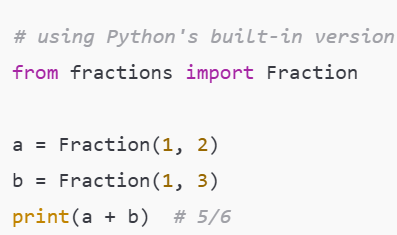
<br>

If you built your own class from scratch, it would do the same thing — but you’d define how it stores the numerator/denominator and how to handle math between two fractions.

It’s an excellent beginner project because it teaches you:

how classes and objects work,

how to override operators like + or -,

and how to make math precise without floating-point errors.

In [9]:
"""
This script demonstrates how to use the Fraction class 
to perform exact arithmetic with rational numbers.
"""

# import Fraction from Python's fractions module
from fractions import Fraction

# create two fraction objects
x = Fraction(999, 1000)
print(x)

# prints 499/500 (Python automatically simplifies fractions)
y = Fraction(998, 1000)
print(y)

# subtract fractions exactly (no rounding errors)
z = x - y
print(z)

999/1000
499/500
1/1000


### Constructor Design:

In [10]:
"""
Representation:
- Immutable once constructed
- not maintain floating point
- keep track of numerator and denominator separately
- reduce fraction
- negative numbers only if necessary

______________________________________________________________

Constructor Design:
- The numerator and denominator are presented at the moment of construction

Special Cases:
- if zero denominator, then raise an exception
- if zero value, then adjust representation
- if negative value, then adjust representation
- if numerator or denominator not inetegers, then raise an exception
"""
    # ----------------- CONSTRUCTOR DESIGN -----------------
    
class FractionDemo:
    # private helper method to reduce (simplify) a fraction
    # and handle the fraction's sign (+ or -)
    def _reduce(self, n, d, sign):
        # take the absolute (positive) values of numerator and denominator
        a = abs(n)
        b = abs(d)

        # find the greatest common divisor (GCD) using Euclid's algorithm
        # this loop keeps running until a divides evenly by b
        while a % b != 0:
            tempA = a       # temporarily store 'a'
            tempB = b       # temporarily store 'b'
            a = tempB       # swap values
            b = tempA % tempB  # take the remainder

        # divide numerator and denominator by GCD and apply sign
        ret_n = abs(n) // b * sign
        ret_d = abs(d) // b

        # return the reduced numerator and denominator as a tuple
        return (ret_n, ret_d)
    
    # constructor: runs when a new fraction object is created
    def __init__(self, numerator, denominator):

        # 1st check: make sure numerator is an integer
        if not isinstance(numerator, int):
            raise TypeError("The numerator of a Fraction must be an integer")

        # 2nd check: make sure denominator is also an integer
        if not isinstance(denominator, int):
            raise TypeError("The denominator of a Fraction must be an integer")

        # special case 1: denominator cannot be zero
        if denominator == 0:
            raise ZeroDivisionError("The denominator of a Fraction can't be zero")

        # special case 2: numerator is zero → fraction equals 0
        if numerator == 0:
            this_numerator = 0
            this_denominator = 1  # set denominator to 1 for a clean representation

        else:
            # determine the sign of the fraction
            # negative if one (but not both) of the numbers is negative
            if (numerator < 0 and denominator >= 0) or (numerator >= 0 and denominator < 0):
                sign = -1
            else:
                sign = 1

            # reduce the fraction to its simplest form using the helper method from _reduce
            this_numerator, this_denominator = self._reduce(numerator, denominator, sign)

        # save the final simplified values as instance attributes
        self.numerator = this_numerator
        self.denominator = this_denominator

       # string representation of the fraction
    # this method defines how the object looks when printed or shown in the console
    def __repr__(self):
        # convert numerator and denominator to strings and join with a "/"
        # using f-string makes it cleaner and avoids type errors
        return f"{self.numerator}/{self.denominator}"
    



In [11]:
# Test Code
from fractions import Fraction

x = Fraction(1,2)
if(str(x) == "1/2"):
    print("Pass")
else:
    print("Fail")

x = Fraction(2,4)
if(str(x) == "1/2"):
    print("Pass")
else:
    print("Fail")

x = Fraction(0,4)
if(str(x) == "0/1"):
    print("Pass")
else:
    print("Fail")

x = Fraction(-10,100)
if(str(x) == "-1/10"):
    print("Pass")
else:
    print("Fail")


Pass
Pass
Fail
Pass


### Comparison Design:
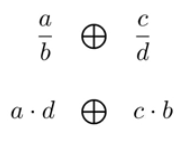

- Leverage the ==, !=, <, >, <=, >=, operations<br>
<br>
To make these tests pass, implement the following in the class:
1. Define __eq__()  → for equality (==)
2. Define __ne__()  → for inequality (!=)
3. Define __lt__()  → for less than (<)
4. Define __le__()  → for less than or equal (<=)
5. Define __gt__()  → for greater than (>)
6. Define __ge__()  → for greater than or equal (>=)

In [12]:
    # ----------------- CONSTRUCTOR DESIGN -----------------


class FractionDemo:
    # private helper method to reduce (simplify) a fraction
    # and handle the fraction's sign (+ or -)
    def _reduce(self, n, d, sign):
        # take the absolute (positive) values of numerator and denominator
        a = abs(n)
        b = abs(d)

        # find the greatest common divisor (GCD) using Euclid's algorithm
        # this loop keeps running until a divides evenly by b
        while a % b != 0:
            tempA = a       # temporarily store 'a'
            tempB = b       # temporarily store 'b'
            a = tempB       # swap values
            b = tempA % tempB  # take the remainder

        # divide numerator and denominator by GCD and apply sign
        ret_n = abs(n) // b * sign
        ret_d = abs(d) // b

        # return the reduced numerator and denominator as a tuple
        return (ret_n, ret_d)
    

    # accessor methods to safely get numerator and denominator
    def getNumerator(self):
        return self.numerator
    def getDenominator(self):
        return self.denominator

    
    # constructor: runs when a new fraction object is created
    def __init__(self, numerator, denominator):

        # 1st check: make sure numerator is an integer
        if not isinstance(numerator, int):
            raise TypeError("The numerator of a Fraction must be an integer")

        # 2nd check: make sure denominator is also an integer
        if not isinstance(denominator, int):
            raise TypeError("The denominator of a Fraction must be an integer")

        # special case 1: denominator cannot be zero
        if denominator == 0:
            raise ZeroDivisionError("The denominator of a Fraction can't be zero")

        # special case 2: numerator is zero → fraction equals 0
        if numerator == 0:
            this_numerator = 0
            this_denominator = 1  # set denominator to 1 for a clean representation

        else:
            # determine the sign of the fraction
            # negative if one (but not both) of the numbers is negative
            if (numerator < 0 and denominator >= 0) or (numerator >= 0 and denominator < 0):
                sign = -1
            else:
                sign = 1

            # reduce the fraction to its simplest form using the helper method from _reduce
            this_numerator, this_denominator = self._reduce(numerator, denominator, sign)

        # save the final simplified values as instance attributes
        self.numerator = this_numerator
        self.denominator = this_denominator

       # string representation of the fraction
    # this method defines how the object looks when printed or shown in the console
    def __repr__(self):
        # convert numerator and denominator to strings and join with a "/"
        # using f-string makes it cleaner and avoids type errors
        return f"{self.numerator}/{self.denominator}"
    


    # ----------------- COMPARISON DESIGN -----------------
    # these methods let us use ==, !=, <, <=, >, >= on FractionDemo objects

    """
    lhs = self is just a naming convenience, not a functional requirement.
    It reads better when reasoning about comparisons, especially if you have many operator methods to maintain.
    x == y means x.__eq__(y)
    Inside the class, self means the object on the left side (x),
    and rhs (right-hand side) means the object on the right side (y).
    """
    
    # equality check (==)
    def __eq__(self, rhs):
        lhs = self
        # two fractions are equal if cross-multiplication gives the same result
        return (lhs.getNumerator() * rhs.getDenominator()) == (lhs.getDenominator() * rhs.getNumerator())
    
    # inequality check (!=)
    def __ne__(self, rhs):
        lhs = self
        # reuse equality logic, just invert it
        return not lhs == rhs
    
    # less-than check (<)
    def __lt__(self, rhs):
        lhs = self
        # compare by cross-multiplying to avoid floating-point division
        return lhs.getNumerator() * rhs.getDenominator() < lhs.getDenominator() * rhs.getNumerator()
    
    # less-than-or-equal check (<=)
    def __le__(self, rhs):
        lhs = self
        # "less than or equal" means not greater than
        return not lhs > rhs
    
    # greater-than check (>)
    def __gt__(self, rhs):
        lhs = self
        # reuse < logic by swapping sides
        return rhs < lhs    
    
    # greater-than-or-equal check (>=)
    def __ge__(self, rhs):
        lhs = self
        # "greater than or equal" means not less than
        return not lhs < rhs
    



In [13]:
"""
This test checks if the Fraction class correctly supports comparison operators:
==, !=, <, <=, >, and >=.

Each method should compare fractions based on their numerical value:
numerator / denominator
"""


# Test Code
x = Fraction(1,2)
y = Fraction(2,4)
z = Fraction(-3,4)

if(x == y):
    print("Pass")
else:
    print("Fail")

if (x != z):
    print("Pass")
else:
    print("Fail")

if (z < y):
    print("Pass")
else:
    print("Fail")

if (x <= y):
    print("Pass")
else:
    print("Fail")    

if (y > z):
    print("Pass")
else:
    print("Fail")

if (x >= z):
    print("Pass")
else:
    print("Fail")

Pass
Pass
Pass
Pass
Pass
Pass


### Arithmetic Design
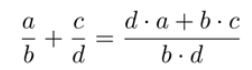

In [14]:
"""
Arithmetic Design:

Goal:
Enable FractionDemo to perform basic math operations with other fractions.

Operators to implement:
1. __add__() → addition (+)
2. __sub__() → subtraction (−)
3. __mul__() → multiplication (×)
4. __truediv__() → division (÷)

Design Notes:
- Each method should return a *new* FractionDemo object (fractions are immutable).
- Use cross-multiplication to avoid floating-point errors.
- Always reduce the result to its simplest form before returning.
- Handle negative signs and zero denominators correctly.
- Ensure both operands are instances of FractionDemo before performing math.
"""


'\nArithmetic Design:\n\nGoal:\nEnable FractionDemo to perform basic math operations with other fractions.\n\nOperators to implement:\n1. __add__() → addition (+)\n2. __sub__() → subtraction (−)\n3. __mul__() → multiplication (×)\n4. __truediv__() → division (÷)\n\nDesign Notes:\n- Each method should return a *new* FractionDemo object (fractions are immutable).\n- Use cross-multiplication to avoid floating-point errors.\n- Always reduce the result to its simplest form before returning.\n- Handle negative signs and zero denominators correctly.\n- Ensure both operands are instances of FractionDemo before performing math.\n'

In [ ]:
    # ----------------- CONSTRUCTOR DESIGN -----------------


class FractionDemo:
    # private helper method to reduce (simplify) a fraction
    # and handle the fraction's sign (+ or -)
    def _reduce(self, n, d, sign):
        # take the absolute (positive) values of numerator and denominator
        a = abs(n)
        b = abs(d)

        # find the greatest common divisor (GCD) using Euclid's algorithm
        # this loop keeps running until a divides evenly by b
        while a % b != 0:
            tempA = a       # temporarily store 'a'
            tempB = b       # temporarily store 'b'
            a = tempB       # swap values
            b = tempA % tempB  # take the remainder

        # divide numerator and denominator by GCD and apply sign
        ret_n = abs(n) // b * sign
        ret_d = abs(d) // b

        # return the reduced numerator and denominator as a tuple
        return (ret_n, ret_d)
    

    # accessor methods to safely get numerator and denominator
    def getNumerator(self):
        return self.numerator
    def getDenominator(self):
        return self.denominator

    
    # constructor: runs when a new fraction object is created
    def __init__(self, numerator, denominator):

        # 1st check: make sure numerator is an integer
        if not isinstance(numerator, int):
            raise TypeError("The numerator of a Fraction must be an integer")

        # 2nd check: make sure denominator is also an integer
        if not isinstance(denominator, int):
            raise TypeError("The denominator of a Fraction must be an integer")

        # special case 1: denominator cannot be zero
        if denominator == 0:
            raise ZeroDivisionError("The denominator of a Fraction can't be zero")

        # special case 2: numerator is zero → fraction equals 0
        if numerator == 0:
            this_numerator = 0
            this_denominator = 1  # set denominator to 1 for a clean representation

        else:
            # determine the sign of the fraction
            # negative if one (but not both) of the numbers is negative
            if (numerator < 0 and denominator >= 0) or (numerator >= 0 and denominator < 0):
                sign = -1
            else:
                sign = 1

            # reduce the fraction to its simplest form using the helper method from _reduce
            this_numerator, this_denominator = self._reduce(numerator, denominator, sign)

        # save the final simplified values as instance attributes
        self.numerator = this_numerator
        self.denominator = this_denominator

       # string representation of the fraction
    # this method defines how the object looks when printed or shown in the console
    def __repr__(self):
        # convert numerator and denominator to strings and join with a "/"
        # using f-string makes it cleaner and avoids type errors
        return f"{self.numerator}/{self.denominator}"
    


    # ----------------- COMPARISON DESIGN -----------------
    # these methods let us use ==, !=, <, <=, >, >= on FractionDemo objects
    
    # equality check (==)
    def __eq__(self, rhs):
        lhs = self
        # two fractions are equal if cross-multiplication gives the same result
        return (lhs.getNumerator() * rhs.getDenominator()) == (lhs.getDenominator() * rhs.getNumerator())
    
    # inequality check (!=)
    def __ne__(self, rhs):
        lhs = self
        # reuse equality logic, just invert it
        return not lhs == rhs
    
    # less-than check (<)
    def __lt__(self, rhs):
        lhs = self
        # compare by cross-multiplying to avoid floating-point division
        return lhs.getNumerator() * rhs.getDenominator() < lhs.getDenominator() * rhs.getNumerator()
    
    # less-than-or-equal check (<=)
    def __le__(self, rhs):
        lhs = self
        # "less than or equal" means not greater than
        return not lhs > rhs
    
    # greater-than check (>)
    def __gt__(self, rhs):
        lhs = self
        # reuse < logic by swapping sides
        return rhs < lhs    
    
    # greater-than-or-equal check (>=)
    def __ge__(self, rhs):
        lhs = self
        # "greater than or equal" means not less than
        return not lhs < rhs
    

     # ----------------- ARITHMETIC DESIGN -----------------
    # These methods let FractionDemo objects use +, -, *, and / directly.
    # Each operation returns a NEW FractionDemo object with the result in simplest form.
    
    # ADDITION: a/b + c/d = (ad + bc) / (bd)
    def __add__(self, rhs):
        lhs = self  # the fraction on the left side of the + operator

        # cross-multiply to get a common denominator:
        # multiply lhs numerator by rhs denominator, and rhs numerator by lhs denominator
        num = lhs.getNumerator() * rhs.getDenominator() + rhs.getNumerator() * lhs.getDenominator()

        # multiply denominators to get the new denominator
        den = lhs.getDenominator() * rhs.getDenominator()

        # return a new simplified Fraction object
        return FractionDemo(num, den)
    

    # SUBTRACTION: a/b - c/d = (ad - bc) / (bd)
    def __sub__(self, rhs):
        lhs = self  # the fraction on the left side of the - operator

        # same logic as addition, but subtract numerators instead of adding
        num = lhs.getNumerator() * rhs.getDenominator() - rhs.getNumerator() * lhs.getDenominator()
        den = lhs.getDenominator() * rhs.getDenominator()
        return FractionDemo(num, den)
    

    # MULTIPLICATION: a/b * c/d = (a * c) / (b * d)
    def __mul__(self, rhs):
        lhs = self

        # multiply numerators and denominators directly
        num = lhs.getNumerator() * rhs.getNumerator()
        den = lhs.getDenominator() * rhs.getDenominator()
        return FractionDemo(num, den)
    

    # DIVISION: (a/b) ÷ (c/d) = (a * d) / (b * c)
    def __truediv__(self, rhs):
        lhs = self
        
        # when dividing, multiply the first fraction by the reciprocal of the second
        # reciprocal means flip numerator and denominator of rhs
        num = lhs.getNumerator() * rhs.getDenominator()
        den = lhs.getDenominator() * rhs.getNumerator()
        return FractionDemo(num, den)


In [20]:
# ==============================================================
# TEST CODE FOR ARITHMETIC DESIGN
# ==============================================================



# Test invalid constructor (should raise TypeError)
try:
    x = Fraction(1.1, 2.2)
    print("Fail")
except:
    print("Pass")

# ---------- Test Subtraction ----------
x = Fraction(999, 1000)
y = Fraction(998, 1000)
answer = Fraction(1, 1000)
z = x - y
if (z == answer):
    print("Pass")
else:
    print("Fail")

if (str(z) == "1/1000"):
    print("Pass")
else:
    print("Fail")

# ---------- Test Addition ----------
x = Fraction(999, 1000)
y = Fraction(998, 1000)
answer = Fraction(1997, 1000)
z = x + y
if (z == answer):
    print("Pass")
else:
    print("Fail")

if (str(z) == "1997/1000"):
    print("Pass")
else:
    print("Fail")

# ---------- Test Multiplication ----------
x = Fraction(1, 2)
y = Fraction(2, 3)
answer = Fraction(1, 3)
z = x * y
if (z == answer):
    print("Pass")
else:
    print("Fail")

if (str(z) == "1/3"):
    print("Pass")
else:
    print("Fail")

# ---------- Test Division ----------
x = Fraction(300, 511)
y = Fraction(1, 2)
answer = Fraction(600, 511)
z = x / y
if (z == answer):
    print("Pass")
else:
    print("Fail")

if (str(z) == "600/511"):
    print("Pass")
else:
    print("Fail")


Pass
Pass
Pass
Pass
Pass
Pass
Pass
Pass
Pass


<br>

### Operator Overloading - Magic Methods

https://www.youtube.com/watch?v=m2JIBytk7Hg<br>
<br>


In [21]:
# Simple example of operator overloading
print(8 + 3)
print("a" + "b")

11
ab


In [22]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

p1 = Point(3,2)
p2 = Point(4,1)

print(p1 + p2)

# Gives an error because Python doesn't know plus means or does for class Point

TypeError: unsupported operand type(s) for +: 'Point' and 'Point'

In [27]:
"""
This program demonstrates **operator overloading** in Python
using a simple class called Point.

Operator overloading means: we can define what symbols like +, ==, or str()
actually *do* for our own custom objects.

Normally, Python knows how to add numbers or join strings.
But with classes, we can teach Python how to "add" or "compare"
our objects in a logical way — like adding points in 2D space.
"""

class Point:
    """A simple class representing a point on a 2D coordinate plane."""

    def __init__(self, x, y):
        """
        Constructor method.
        Called automatically when creating a new Point object.
        Example: Point(3, 2)
        """
        self.x = x
        self.y = y

    # ----------------------------------------------------------
    # OPERATOR OVERLOADING SECTION
    # ----------------------------------------------------------

    def __add__(self, other):
        """
        Overloads the + operator.
        This method defines how to "add" two Point objects.
        Instead of combining them as strings or numbers,
        we add their x and y values separately.

        Example:
        Point(3, 2) + Point(4, 1) = Point(7, 3)
        """
        # create and return a *new* Point whose coordinates
        # are the sum of the x's and the sum of the y's
        return Point(self.x + other.x, self.y + other.y)

    def __eq__(self, other):
        """
        Overloads the == operator.
        This method defines when two Point objects are considered *equal*.

        Two points are equal if BOTH their x and y coordinates are the same.
        Example:
        Point(3, 2) == Point(3, 2) → True
        """
        return self.x == other.x and self.y == other.y

    def __str__(self):
        """
        Overloads the str() function.
        Defines what gets shown when you print() the object.
        Instead of printing a memory address, we return a readable format.
        Example:
        print(Point(3, 2)) → (3, 2)
        """
        return f'({self.x}, {self.y})'


# ----------------------------------------------------------
# TESTING OUR OVERLOADED OPERATORS
# ----------------------------------------------------------

# create two Point objects
p1 = Point(3, 2)
p2 = Point(4, 1)

# demonstrate addition using overloaded +
p3 = p1 + p2  # same as calling p1.__add__(p2)

# another point for equality testing
p4 = Point(3, 2)

# print() calls __str__ automatically → shows coordinates, not memory address
print("p3 =", p3)  # Output: (7, 3)

# test equality using overloaded ==
print("p1 == p2 ?", p1 == p2)  # False (different coordinates)
print("p1 == p4 ?", p1 == p4)  # True (same coordinates)


# ----------------------------------------------------------
# BONUS: more examples to reinforce learning
# ----------------------------------------------------------

# Python internally calls:
# p1 + p2  →  p1.__add__(p2)
# p1 == p4 →  p1.__eq__(p4)
# str(p3)  →  p3.__str__()

# You can even see it explicitly:
print("Explicit call:", Point.__add__(p1, p2))  # same result as p1 + p2

"""
Takeaway:
Operator overloading makes your custom objects behave like built-in types.
It improves readability and usability — making code more natural to use.
"""


p3 = (7, 3)
p1 == p2 ? False
p1 == p4 ? True
Explicit call: (7, 3)


'\nTakeaway:\nOperator overloading makes your custom objects behave like built-in types.\nIt improves readability and usability — making code more natural to use.\n'

<br>

## Theory

| **Question**                      | **Answer (Short Description)**                                                                                                                     |
| --------------------------------- | -------------------------------------------------------------------------------------------------------------------------------------------------- |
| **a) Class vs Instance**          | A **class** is a blueprint or template (e.g., “Car”), while an **instance** is a specific object created from that class (e.g., “my_car”).         |
| **b) Purpose of `__init__`**      | Initializes object attributes when a new instance is created — sets up its starting state.                                                         |
| **c) Method Overloading**         | Using the same method name with different parameters. Python doesn’t support it directly; you can mimic it with default arguments or `*args`.      |
| **d) Polymorphism**               | Different objects can share the same method name but perform different actions (e.g., `Dog.speak()` vs `Cat.speak()`).                             |
| **e) `super()` Function**         | Allows a subclass to call methods from its parent class — commonly used to reuse `__init__` from the base class.                                   |
| **f) Composition vs Inheritance** | **Inheritance:** a class *is a* type of another (`Car` → `Vehicle`). <br> **Composition:** a class *has a* relationship (`Car` *has an* `Engine`). |
| **g) Benefits of Unit Testing**   | Ensures each part of the code works correctly, catches bugs early, improves code reli                                                              |


## Glossary

| **terminology**                   | **explanation**                                                                                                              |
| --------------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| **class**                         | A blueprint or template that defines how objects are structured and behave.                                                  |
| **object**                        | A specific entity created from a class; it holds data and can perform actions.                                               |
| **instance**                      | Another word for an object — a single, concrete version of a class.                                                          |
| **encapsulation**                 | The practice of hiding internal details of a class and only exposing what’s necessary through methods or properties.         |
| **private**                       | Attributes or methods meant to be hidden from outside access (often indicated by `_` or `__` in Python).                     |
| **property**                      | A special method that lets you access or modify private data safely using getter/setter logic.                               |
| **validation**                    | Checking that input data is correct and within expected limits before using it.                                              |
| **abstraction**                   | Hiding complex details and showing only the essential features of an object or system.                                       |
| **polymorphism**                  | The ability of different objects to respond differently to the same method name.                                             |
| **method overloading**            | Having multiple methods with the same name but different parameters (not natively supported in Python, but can be mimicked). |
| **inheritance**                   | When a class derives from another, gaining its properties and methods.                                                       |
| **composition**                   | Building complex classes by combining simpler ones; a class “has a” relationship with another.                               |
| **base class**                    | The original class that is inherited from; also called the parent or superclass.                                             |
| **superclass**                    | A class that another class inherits from; provides shared functionality.                                                     |
| **parent**                        | Another term for a superclass — the class being inherited from.                                                              |
| **child**                         | The class that inherits from another; also known as a subclass.                                                              |
| **unit test**                     | A small test that checks if one specific piece of code (like a method) works correctly.                                      |
| **assertion**                     | A statement that checks if a condition is true; used in testing to verify results.                                           |
| **test coverage**                 | The percentage of your code that is tested by unit tests. Higher coverage means fewer untested parts.                        |
| **TDD (Test-Driven Development)** | A coding approach where you write tests first, then write the code to make them pass.                                        |
|                                   |                                                                                                                              |
